# Model 2: Logistic Regression

In [1]:
# Update sklearn
#!pip install sklearn --upgrade
# Install joblib
#!pip install joblib

In [2]:
# Import dependencies
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
# Load in exoplanet data
planets_df = pd.read_csv("resources/exoplanet_data.csv")
planets_df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


In [4]:
# Show all columns
planets_df.columns

Index(['koi_disposition', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_steff', 'koi_steff_err1',
       'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2',
       'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec',
       'koi_kepmag'],
      dtype='object')

In [5]:
# Drop null columns & rows
planets_df = planets_df.dropna(axis='columns', how='all')
planets_df = planets_df.dropna(how="any")
planets_df

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6986,FALSE POSITIVE,0,0,0,1,8.589871,1.846000e-04,-1.846000e-04,132.016100,0.015700,...,-152,4.296,0.231,-0.189,1.088,0.313,-0.228,298.74921,46.973351,14.478
6987,FALSE POSITIVE,0,1,1,0,0.527699,1.160000e-07,-1.160000e-07,131.705093,0.000170,...,-166,4.529,0.035,-0.196,0.903,0.237,-0.079,297.18875,47.093819,14.082
6988,CANDIDATE,0,0,0,0,1.739849,1.780000e-05,-1.780000e-05,133.001270,0.007690,...,-220,4.444,0.056,-0.224,1.031,0.341,-0.114,286.50937,47.163219,14.757
6989,FALSE POSITIVE,0,0,1,0,0.681402,2.430000e-06,-2.430000e-06,132.181750,0.002850,...,-236,4.447,0.056,-0.224,1.041,0.341,-0.114,294.16489,47.176281,15.385


## Select Features

In [6]:
X = planets_df.drop("koi_disposition", axis=1)
# X = planets_df[['koi_fpflag_co', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_model_snr', 'koi_prad', 'koi_fpflag_ec']]
y = planets_df["koi_disposition"]
print(X.shape, y.shape)

(6991, 40) (6991,)


In [7]:
# Feature selection & remove unnecessary features (feature importance below 0)
X = planets_df.drop(['koi_disposition', 'koi_srad', 'koi_steff', 'koi_slogg', 'koi_slogg_err1', 'koi_srad_err2', 'koi_tce_plnt_num'], axis=1)
print(X.shape)

(6991, 34)


## Train, Test, Split

In [8]:
# Separate the data into training & testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [9]:
# Show rows for training
X_train

,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,koi_time0bk_err2,...,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_steff_err1,koi_steff_err2,koi_slogg_err2,koi_srad_err1,ra,dec,koi_kepmag
6122,0,0,0,0,6.768901,7.380000e-05,-7.380000e-05,133.077240,0.008440,-0.008440,...,204.89,-103.87,10.8,154,-171,-0.187,0.310,294.40472,39.351681,14.725
6370,0,1,0,1,0.733726,6.060000e-06,-6.060000e-06,132.020050,0.007950,-0.007950,...,2253.61,-677.78,13.8,158,-175,-0.187,0.211,284.50391,42.463860,15.770
2879,1,0,0,0,7.652707,6.540000e-05,-6.540000e-05,134.460380,0.006190,-0.006190,...,195.16,-64.34,254.3,151,-189,-0.200,0.290,295.50211,38.983540,13.099
107,0,0,0,0,7.953547,1.910000e-05,-1.910000e-05,174.662240,0.001820,-0.001820,...,7.15,-10.12,38.4,76,-85,-0.016,0.023,291.15878,40.750271,15.660
29,0,0,0,0,4.959319,5.150000e-07,-5.150000e-07,172.258529,0.000083,-0.000083,...,146.52,-93.21,696.5,77,-77,-0.110,0.173,292.16705,48.727589,15.263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,0,1,0,0,8.268081,6.340000e-07,-6.340000e-07,135.056330,0.000064,-0.000064,...,113.80,-37.92,1320.5,156,-190,-0.200,0.273,292.53125,46.728699,15.768
5191,0,0,0,0,11.161938,1.677000e-04,-1.677000e-04,133.553800,0.013000,-0.013000,...,163.60,-142.69,13.4,124,-124,-0.101,0.281,295.21268,49.562180,13.374
5226,0,1,0,0,6.150251,7.000000e-07,-7.000000e-07,134.422825,0.000088,-0.000088,...,6163.40,-4172.88,471.0,246,-458,-0.180,0.988,297.18176,45.988441,10.622
5390,1,0,0,0,3.343285,4.380000e-05,-4.380000e-05,134.845100,0.011200,-0.011200,...,2293.97,-2861.36,79.5,177,-197,-0.098,0.433,296.86258,41.147419,13.276


## Pre-Processing

### Min Max Scaler (x)

In [10]:
# MinMaxScaler: scale the numerical data
# Define the scaler
X_scaler = MinMaxScaler().fit(X_train)

# Transform x train & test (with scaler)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### One Hot Encoding (y)

### Canidate: 0
### Confirmed: 1
### False Positive: 2

In [11]:
# Encode labels for y: "KOI disposition"
label_encoder = LabelEncoder()

# Train the encoder
label_encoder.fit(y_train)

# Encoded y train & test
encoded_y_train = label_encoder.transform(y_train)
encoded_y_test = label_encoder.transform(y_test)

In [12]:
# One hot encoding
y_train_categorical = to_categorical(encoded_y_train)
y_test_categorical = to_categorical(encoded_y_test)

In [13]:
# See the categories
y_train_categorical

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]], dtype=float32)

## Train the Model

### Logistic Regression Model:

In [14]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=3000, C=1000)
classifier

LogisticRegression(C=1000, max_iter=3000, multi_class='multinomial')

In [15]:
classifier.fit(X_train_scaled, y_train)

LogisticRegression(C=1000, max_iter=3000, multi_class='multinomial')

In [16]:
print(f"Training Data Score: {classifier.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test_scaled, y_test)}")

Training Data Score: 0.8899485027655922
Testing Data Score: 0.8861556064073226


In [17]:
# Predict
predictions = classifier.predict(X_test_scaled)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
4982,FALSE POSITIVE,FALSE POSITIVE
4866,CANDIDATE,CANDIDATE
2934,FALSE POSITIVE,FALSE POSITIVE
5007,FALSE POSITIVE,FALSE POSITIVE
3869,FALSE POSITIVE,FALSE POSITIVE
...,...,...
4006,CONFIRMED,CANDIDATE
6985,CANDIDATE,CANDIDATE
1468,CONFIRMED,CONFIRMED
5138,CANDIDATE,CONFIRMED


## Confusion Matrix:

In [18]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[290 113   8]
 [ 68 408   8]
 [  2   0 851]]


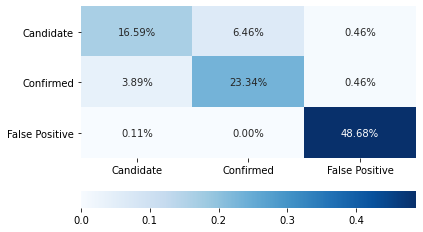

In [19]:
import seaborn as sns
import numpy as np
categories=["Candidate", "Confirmed", "False Positive"]
ax = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues', xticklabels=categories, yticklabels=categories, 
            cbar_kws={"orientation": "horizontal"})

## Hyperparameter Tuning

In [20]:
# GridSearchCV: tune model parameters
from sklearn.model_selection import GridSearchCV
parameters = {"penalty":["l2"], "solver":["lbfgs"], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000]}
grid = GridSearchCV(classifier, parameters, verbose=3)

In [21]:
# Train the model with GridSearch
grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.505 total time=   0.0s
[CV 2/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.506 total time=   0.1s
[CV 3/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.505 total time=   0.1s
[CV 4/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.506 total time=   0.0s
[CV 5/5] END .C=0.001, penalty=l2, solver=lbfgs;, score=0.506 total time=   0.0s
[CV 1/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.830 total time=   0.1s
[CV 2/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.814 total time=   0.1s
[CV 3/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.828 total time=   0.1s
[CV 4/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.804 total time=   0.1s
[CV 5/5] END ..C=0.01, penalty=l2, solver=lbfgs;, score=0.807 total time=   0.1s
[CV 1/5] END ...C=0.1, penalty=l2, solver=lbfgs;, score=0.839 total time=   0.1s
[CV 2/5] END ...C=0.1, penalty=l2, solver=lbfgs;,

GridSearchCV(estimator=LogisticRegression(C=1000, max_iter=3000,
                                          multi_class='multinomial'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 2000],
                         'penalty': ['l2'], 'solver': ['lbfgs']},
             verbose=3)

In [22]:
# Best C params - re-inserted in model above to re-tune
print(grid.best_params_)

{'C': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}


In [23]:
# Best score
print(grid.best_score_)

0.8865126001499064


## Save the Model:

### Not saved: not best results

In [24]:
# import joblib
# filename = 'models/julia_brunett.sav'
# joblib.dump(model, filename)